In [ ]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.style.use('fivethirtyeight')

In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 1.0MB 5.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.10-cp36-cp36m-linux_x86_64.whl size=2683450 sha256=3c0f3771d7e1ad246bf39952adbdb386558bd95ecd7dc7f0d03927f7afcc14d2
  Stored in directory: /root/.cache/pip/wheels/64/d6/c9/9295499aefa5af80018eaabffd09216170a1349b45551fb8d5
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models 
from pypfopt import expected_returns 

# **Calculting Returns and Volatility Using Evenly Distributed Profolio**

In [ ]:
#wrtting down stock tickers
assets = ['BNGO','SENS','SNDL','ZOM','CTRM']

In [ ]:
#assign weights, an array with the sum of 1 (percentage of each investment on my porfolio)
weights = (1/len(assets))*np.ones(len(assets))
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
#get the porfolio starting date
start_date = '2020-01-01'

In [ ]:
#get the stock ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-02-19'

In [ ]:
#create a dataframe and store the adjusted close price of the stocks
df=pd.DataFrame()

for stock in assets:
  df[stock] = web.DataReader(stock,data_source='yahoo',start=start_date,end=today)['Adj Close']

In [ ]:
df

,BNGO,SENS,SNDL,ZOM,CTRM
Date,,,,,
2020-01-02,1.24,0.881,3.03,0.331,1.904
2020-01-03,1.23,0.890,2.89,0.332,1.920
2020-01-06,1.27,0.861,2.97,0.313,1.940
2020-01-07,1.24,0.888,2.84,0.313,1.920
2020-01-08,1.24,0.864,2.71,0.320,1.880
...,...,...,...,...,...
2021-02-11,11.70,3.810,2.38,2.660,1.730
2021-02-12,13.70,4.160,2.08,2.570,1.470
2021-02-16,15.57,5.270,2.19,2.370,1.400


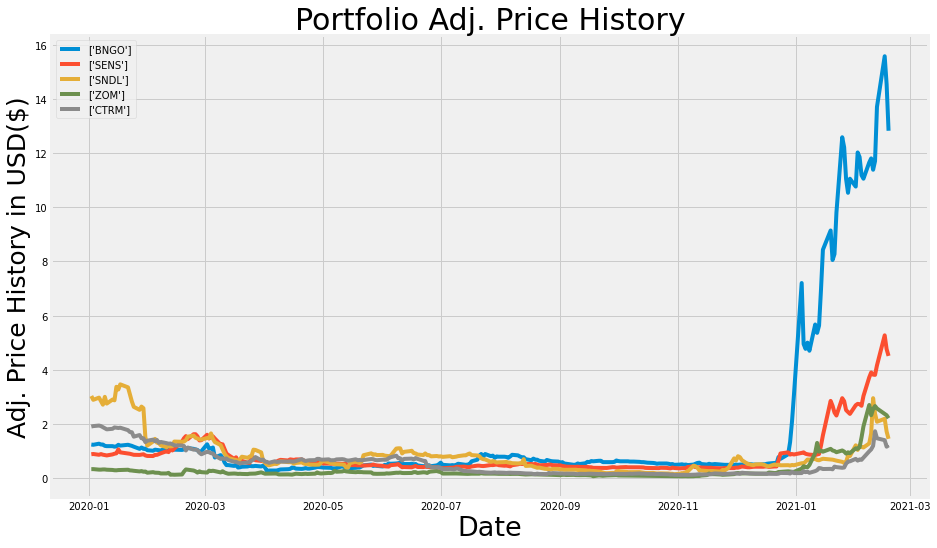

In [ ]:
title = 'Portfolio Adj. Price History'

plt.figure(figsize=(14,8.5))
for column in df.columns.values:
  plt.plot(df[column],label = [column])
  
plt.title(title,fontsize=30)
plt.ylabel('Adj. Price History in USD($)',fontsize=25)
plt.xlabel('Date', fontsize=27)
plt.legend()

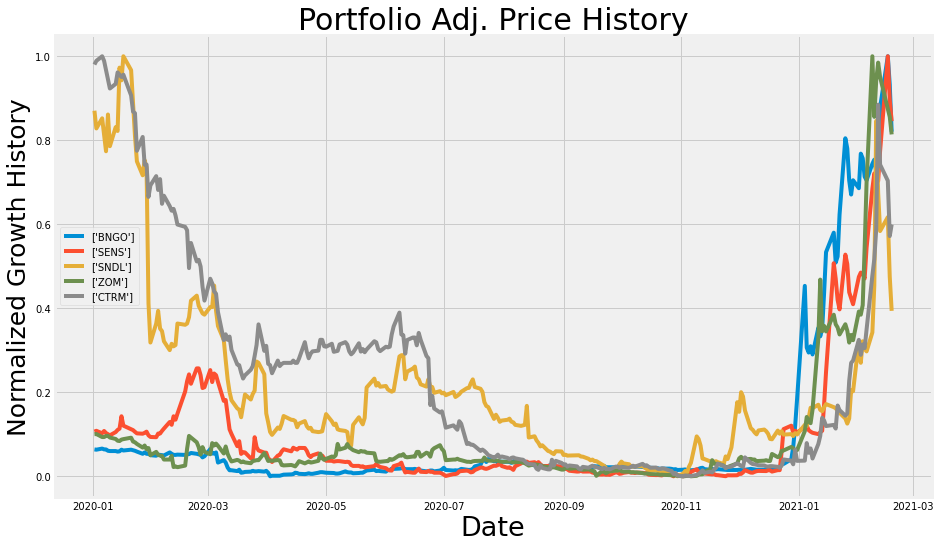

In [ ]:
# stock data visualization

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_pri = pd.DataFrame(data=x_scaled,columns=df.columns) # a dataframe for normalized price
norm_pri.index = df.index

title = 'Portfolio Adj. Price History'

plt.figure(figsize=(14,8.5))
for column in norm_pri.columns.values:
  plt.plot(norm_pri[column],label = [column])
  
plt.title(title,fontsize=30)
plt.ylabel('Normalized Growth History',fontsize=25)
plt.xlabel('Date', fontsize=27)
plt.legend()

In [ ]:
norm_pri

,BNGO,SENS,SNDL,ZOM,CTRM
Date,,,,,
2020-01-02,0.064010,0.106474,0.870326,0.100266,0.980241
2020-01-03,0.063357,0.108306,0.828106,0.100646,0.989023
2020-01-06,0.065970,0.102402,0.852232,0.093430,1.000000
2020-01-07,0.064010,0.107899,0.813028,0.093430,0.989023
2020-01-08,0.064010,0.103013,0.773824,0.096088,0.967069
...,...,...,...,...,...
2021-02-11,0.747224,0.702769,0.674306,0.984808,0.884742
2021-02-12,0.877858,0.774023,0.583836,0.950627,0.742042
2021-02-16,1.000000,1.000000,0.617008,0.874668,0.703622


In [ ]:
#show daily simple returns

returns = df.pct_change()

returns

,BNGO,SENS,SNDL,ZOM,CTRM
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.008065,0.010216,-0.046205,0.003021,0.008403
2020-01-06,0.032520,-0.032584,0.027682,-0.057229,0.010417
2020-01-07,-0.023622,0.031359,-0.043771,0.000000,-0.010309
2020-01-08,0.000000,-0.027027,-0.045775,0.022364,-0.020833
...,...,...,...,...,...
2021-02-11,0.028119,-0.002618,-0.193220,0.043137,0.453781
2021-02-12,0.170940,0.091863,-0.126050,-0.033835,-0.150289
2021-02-16,0.136496,0.266827,0.052885,-0.077821,-0.047619


In [ ]:
#create annuallized covariance matrix

trading_days = 253+19+13 
# 253 is the trading days of 2020
# 29 is the trading days of jan. 2021
# 13 is the trading days from 2/1/2021 to 2/18/2021

yearly_cov_mat = returns.cov()*trading_days

yearly_cov_mat

,BNGO,SENS,SNDL,ZOM,CTRM
BNGO,4.502181,0.791806,0.478540,0.913853,0.086192
SENS,0.791806,2.485278,0.369261,0.439277,0.301507
SNDL,0.478540,0.369261,5.508335,0.437752,0.637114
ZOM,0.913853,0.439277,0.437752,5.049696,0.542899
CTRM,0.086192,0.301507,0.637114,0.542899,2.338007


In [ ]:
port_variance = np.dot(weights,np.dot(yearly_cov_mat,weights.T))
port_variance

1.1951960325955615

In [ ]:
#calculation the profolio volatiliy, aka the STDs

port_std = np.sqrt(port_variance)

port_std

1.0932502149990924

In [ ]:
#calculate the annual profolio return

yr_return = np.sum(np.matmul(weights,returns.mean()))*trading_days

yr_return

2.609074741675485

In [ ]:
#annual return, volatility (risk), and variance

pct_var = str(np.round(port_variance,2)*100)+'%'
pct_vol = str(np.round(port_std,2)*100)+'%'
pct_ret = str(np.round(yr_return,2)*100)+'%'

print('expected annual return: '+pct_ret+';')
print('expected annual volatility: '+pct_vol+';')
print('expected annual variance: '+pct_var+'.')

expected annual return: 261.0%;
expected annual volatility: 109.00000000000001%;
expected annual variance: 120.0%.


#**Portfolio Opimization via Maximizing the Sharpe Ratio**

In [ ]:
#calculate the expected returns and the annualized sample covariance matrix

mu = expected_returns.mean_historical_return(df) # mu stands for mean
s = risk_models.sample_cov(df)  # sample covrariance matrix

#optimize for max sharpe ratio - how much return I received for some amount of volatility (William Shapre, 1966)

ef = EfficientFrontier(mu,s)
weights = ef.max_sharpe()
cleanned_w = ef.clean_weights() # get rid of the stocks I don't need to optimize my portfolio

print('Cleanned Weights: '+str(cleanned_w))

ef.portfolio_performance(verbose = True)

Cleanned Weights: OrderedDict([('BNGO', 0.48596), ('SENS', 0.30059), ('SNDL', 0.0), ('ZOM', 0.21344), ('CTRM', 0.0)])
Expected annual return: 529.2%
Annual volatility: 132.8%
Sharpe Ratio: 3.97


(5.29237495349209, 1.328197730723017, 3.9695708188132675)

In [ ]:
s

,BNGO,SENS,SNDL,ZOM,CTRM
BNGO,3.980876,0.700123,0.423130,0.808039,0.076212
SENS,0.700123,2.197509,0.326505,0.388413,0.266596
SNDL,0.423130,0.326505,4.870528,0.387065,0.563343
ZOM,0.808039,0.388413,0.387065,4.464995,0.480037
CTRM,0.076212,0.266596,0.563343,0.480037,2.067290


In [ ]:
# get the dicrete allocation of each stock
from pypfopt.discrete_allocation import DiscreteAllocation as da
from pypfopt.discrete_allocation import get_latest_prices as glp

In [ ]:
latest_prices = glp(df)
dis_all = da(cleanned_w,latest_prices,total_portfolio_value=1e9)

allocation, leftover=dis_all.lp_portfolio()

print('Discrete Allocation: '+str(allocation))
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete Allocation: {'BNGO': 37906398, 'SENS': 66649664, 'ZOM': 96579184}
Funds Remaining: $9988.99
